# Convolutional nets

## Primary use case: computer vision

# Example: MNIST

In the previous MNIST, we did a Dense neural net, which achieved an accuracy of ~97%

We will now use a convnet to solve the problem and evalute its performance

## Import and prep the data

In [1]:
import keras
keras.__version__

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Build the network

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Flatten the output and push into a Dense network for creating an output

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Display the architecture of the network

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## Comsummarye and fit

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 19ms/step - loss: 0.1705 - accuracy: 0.9468
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0192 - accuracy: 0.9942


## Evaluate

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0282 - accuracy: 0.9922


In [7]:
test_acc

0.9922000169754028

## Result

The original dense network had an accuracy of 97.8%. The convnet goes up to 99.22%. This is a 68% improvement in the error rate.

# Gradually improving network performance

In [3]:
import os, shutil

In [4]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = './data/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = './data/dogs-vs-cats-small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Count the data in the folder

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [6]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [7]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [8]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [9]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [10]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## First try: normal architecture
### Build the network

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compile the network

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Prepare the data

* Read the picture files
* Convert the JPEG files into grids of RGB values
* Convert to floating-point tensors
* Rescale the pixel values to [0, 1]

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train the model

In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 50s 497ms/step - loss: 0.6813 - acc: 0.5575 - val_loss: 0.6638 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 53s 529ms/step - loss: 0.6522 - acc: 0.6150 - val_loss: 0.6310 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 50s 500ms/step - loss: 0.6025 - acc: 0.6745 - val_loss: 0.6725 - val_acc: 0.5710
Epoch 4/30
100/100 [==============================] - 58s 579ms/step - loss: 0.5710 - acc: 0.7025 - val_loss: 0.6138 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 60s 604ms/step - loss: 0.5516 - acc: 0.7170 - val_loss: 0.5942 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 52s 515ms/step - loss: 0.5286 - acc: 0.7280 - val_loss: 0.5746 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 49s 494ms/step - loss: 0.5101 - acc: 0.7525 - val_loss: 0.5714 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 5

Save the model

In [18]:
model.save('cats_and_dogs_small_1.h5')

### Plot the model's performance

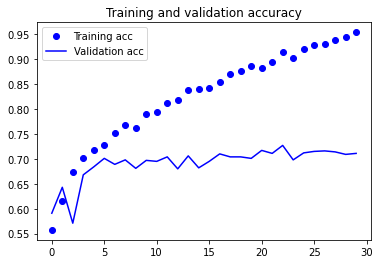

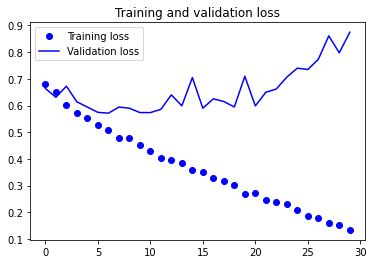

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data augmentation

The model is clearly overfitting.

We will now use data augmentation to improve the performance of the model. This is a technique exclusive to computer vision problems.

We will use data transformations to create new training samples which are reliable.

In [20]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### Add a dropout layer to the network

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Train the model

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 73s 733ms/step - loss: 0.6913 - acc: 0.5314 - val_loss: 0.6837 - val_acc: 0.5152
Epoch 2/100
100/100 [==============================] - 75s 745ms/step - loss: 0.6747 - acc: 0.5676 - val_loss: 0.6554 - val_acc: 0.6140
Epoch 3/100
100/100 [==============================] - 73s 727ms/step - loss: 0.6617 - acc: 0.5955 - val_loss: 0.6361 - val_acc: 0.6294
Epoch 4/100
100/100 [==============================] - 76s 758ms/step - loss: 0.6439 - acc: 0.6146 - val_loss: 0.6539 - val_acc: 0.5966
Epoch 5/100
100/100 [==============================] - 72s 721ms/step - loss: 0.6307 - acc: 0.6391 - val_loss: 0.6375 - val_acc: 0.6098
Epoch 6/100
100/100 [==============================] - 73s 731ms/step - loss: 0.6103 - acc: 0.6562 - val_loss: 0.6153 - val_acc: 0.6579
Epoch 7/100
100/100 [==============================] - 74s 739ms/step - loss: 0.6111 - acc: 0.6638 -

In [23]:
model.save('cats_and_dogs_small_2.h5')

## Increasing the performance by using a pre-trained network

_ImageNet_ includes classifications of a large dataset of many animals, including cats and dogs. We can use that pre-trained network for our benefit.

We will use _feature extraction_ and _fine tuning_.

In [13]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


### Extract features from the pretrained convolutional network

In [14]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './data/dogs-vs-cats-small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Define the densely connected classifier

In [15]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 17ms/step - loss: 0.6055 - acc: 0.6595 - val_loss: 0.4355 - val_acc: 0.8430
Epoch 2/30
100/100 [==============================] - 2s 15ms/step - loss: 0.4287 - acc: 0.8020 - val_loss: 0.3737 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 2s 15ms/step - loss: 0.3585 - acc: 0.8340 - val_loss: 0.3183 - val_acc: 0.8880
Epoch 4/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3153 - acc: 0.8710 - val_loss: 0.2970 - val_acc: 0.8900
Epoch 5/30
100/100 [==============================] - 2s 15ms/step - loss: 0.2833 - acc: 0.8835 - val_loss: 0.2974 - val_acc: 0.8880
Epoch 6/30
100/100 [==============================] - 2s 15ms/step - loss: 0.2584 - acc: 0.9000 - val_loss: 0.2747 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2404 - acc: 0.9025 - val_loss: 0.2666 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 2s 16ms/step - 

Let's look at the loss and accuracy

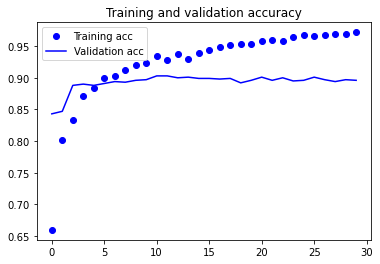

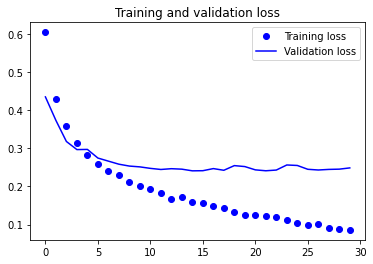

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Accuracy increases to about 90%, but overfitting kicks in almost from the start, even with regularization. This is because this technique does not use data augmentation.

### Feature extraction with data augmentation

Use this technique only on GPU.

Add the convulational base as a layer to the model. Freeze this model so that it is not changed by training.

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
conv_base.trainable = False

Now train the model with the frozen convolutional base

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


KeyboardInterrupt: 

### Fine-tuning

Consists of unfreezing some of the higher-level layers of the convolutional base and put them through the training process. Before you do this, your densely connected classifier must be already trained, otherwise the error signal propagating back into the network will be too large. This will destroy the representations on the layers you want to fine-tune

Process for fine-tuning:

- Add your customer network on top of an already trained convolutional base
- Freeze the base
- Train your densely connected layers
- Unfreeze some layers in the convolutional base
- Jointly train both these layers and your densely connected part

In [21]:
model = keras.models.load_model("./data/dogs-vs-cats-small/cats_and_dogs_small_pretrained_with_data_augmentation.h5")

In [22]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
 45/100 [============>.................] - ETA: 2:25 - loss: 0.3538 - acc: 0.8556

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Run on the test data set

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)